<a href="https://colab.research.google.com/github/farrelrassya/nlpspacybeginners/blob/main/1.Basics_of_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will not be working with spaCy in code, rather in concept. This entire JupyterBook is designed around approaching spaCy top-down. approaching the things that spaCy does and can do and then exploring how to implement that in code. I think this is necessary so that as you explore the smaller components of spaCy, such as the Lemmatizer, you will understand how it fits into the larger architecture of the spaCy framework.

In [ ]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

# To filter warnings based on their category
# For example, to ignore all DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# To filter warnings based on their message
# For example, to ignore a specific warning message
warnings.filterwarnings("ignore", message="Specific warning message")

# Your code goes here

# Resetting the warning filters after the code block
warnings.resetwarnings()


# The Basics of spaCy

In this notebook, we will not be working with spaCy in code, rather in concept. This entire JupyterBook is designed around approaching spaCy top-down. By this I mean approaching the things that spaCy does and can do and then exploring how to implement that in code. I think this is necessary so that as you explore the smaller components of spaCy, such as the Lemmatizer, you will understand how it fits into the larger architecture of the spaCy framework.

## What is spaCy?

A good way to begin is by exploring the question, “What is spaCy?” spaCy (yes, spelled with a lowercase “s” and uppercase “C” is a natural language processing framework). Natural language processing, or NLP, is a branch of linguistics that seeks to parse human language in a computer system. This field is generally referred to as computational linguistics, though it has far reaching applications beyond academic linguistic research.

NLP is used in every sector of industry, from academics who leverage it to aid in research to financial analysts who try and predict the stock market. Lawyers use NLP to help analyze thousands of legal documents in seconds to target their research and medical doctors use it to parse patient charts. NLP has been around for decades, but with the increased promise of deep learning, a subfield of machine learning, that NLP rapidly expanded. This is because, as we shall learn all too well throughout this book, language is inherently ambiguous. By this, I mean that language does not always make perfect sense. In some cases, it is entirely illogical. The double-negative in English is a good example of this. In some contexts, it can be an emphatic positive, as in, “I cannot stress this enough, I do not like pasta.” This is, of course a lie. I love pasta, but you get my point. In other cases, the double negative can be an emphatic negative, as in, “I ain’t not doing that!”

As humans, especially native speakers of a language, we can parse these complex illogical statements with ease, especially with enough context. For computers, this is not always easy.

Because NLP is such a complex problem for computers, it requires a complex solution. The answer has been found in artificial neural networks, or ANNs or neural nets for short. These are the primary areas of research for deep learning practitioners. As the field of deep learning (and machine learning in general) expand and advance, so too does NLP. New methods for training, such as transformer models, push the field further.

## How to Install spaCy

In order to install spaCy, I recommend visiting their website, here: https://spacy.io/usage . They have a nice user-friendly interface. Input your device settings, e.g. Mac or Windows or Linux, and your language, e.g. English, French, or German. The web-app will automatically populate the commands that you need to execute to get started. Since this is a JupyterBook, we can install these with a “!” before in a cell to indicate that we want to run a terminal command. I will be installing spaCy and thee small English model, en_core_web_sm.

In [ ]:
!pip install -q spacy


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!python -m -q spacy download en_core_web_sm

/usr/bin/python3: No module named -q


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Importing spaCy and Loading Data

In [ ]:
import spacy

In [ ]:
import warnings

# Filter out ImportWarning
warnings.filterwarnings("ignore", category=ImportWarning)

# Now load spacy
nlp = spacy.load("en_core_web_sm")


Excellent! spaCy is now installed correctly and we have successfully downloaded the small English model. We will pick up here with the code in the next notebook. For now, I want to focus on big-picture items, specifically spaCy “containers”.

In [ ]:
with open ("wiki_us.txt", "r") as f:
    text = f.read()

In [ ]:
print (text)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

## Creating a Doc Container

Containers are spaCy objects that contain a large quantity of data about a text. When we analyze texts with the spaCy framework, we create different container objects to do that. Here is a full list of all spaCy containers. We will be focusing on three (emboldened): Doc, Span, and Token.

In [ ]:
doc = nlp(text)

In [ ]:
print (doc)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

1. Doc
2. DocBin
3. Example
4. Language
5. Lexeme
6. Span
7. SpanGroup
8. Token

I created the image below to show how I visualize spaCy containers in my mind. At the top, we have a Doc container. This is the basis for all spaCy. It is the main object that we create. Within the Doc container are many different attributes and subcontainers. One attribute is the Doc.sents, which contains all the sentences in the Doc container. The doc container (and each sentence generator) is made up of a set of token containers. These are things like words, punctuation, etc.

Span containers are kind of like token, in that they are a piece of a Doc container. Spans have one thing that makes them unique. They can cross multiple tokens.

We can give spans a bit more specificity by classifying them into different groups. These are known as SpanGroup containers.

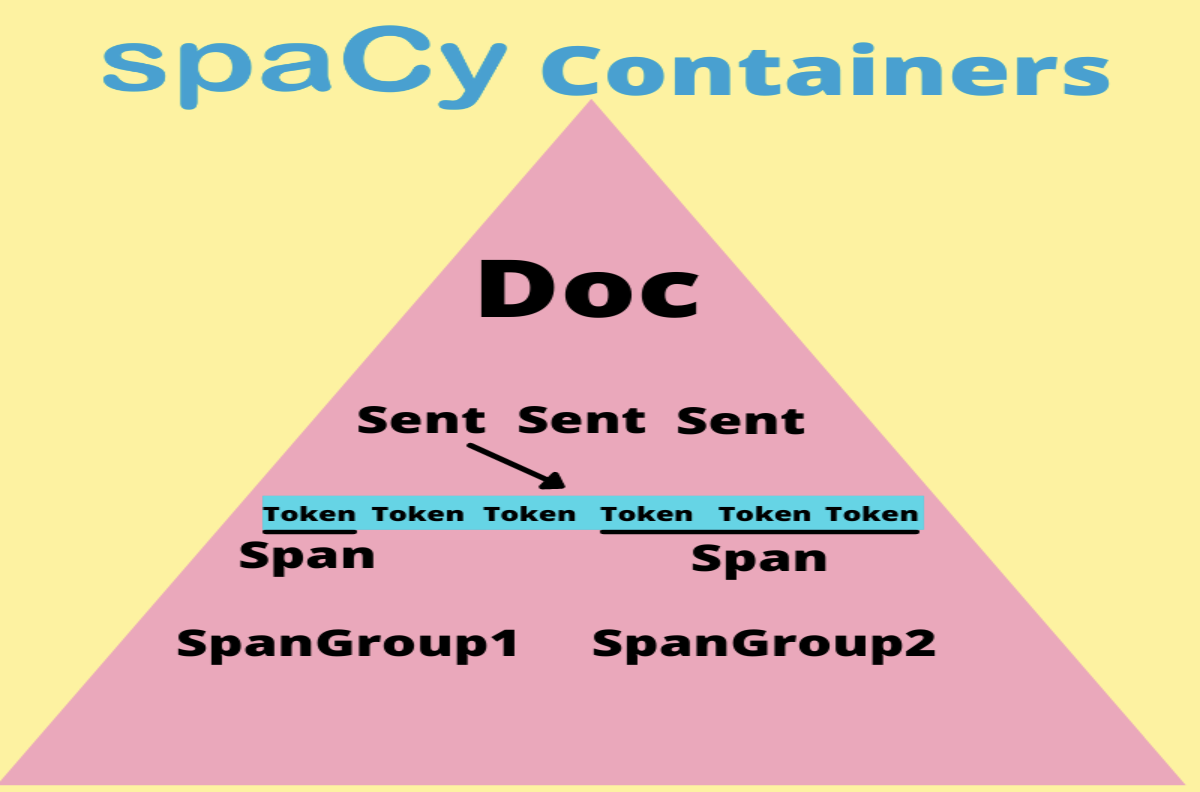